In [1]:
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle

import sys
sys.path.append('..')

import src as odyn

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable

In [2]:
odyn.OpinionNetworkModel

src.simulations.OpinionNetworkModel

# Initialize Model

Models are initialized in four different configurations where heighbor connections are determined by

* opinion proximity
* weight
* distance 
* opinion proximity, weight and distance (i.e. the full ODyN model)

We'll begin by setting our choice of model parameters.

In [8]:
proportion_willing = .5
proportion_hesitant = .5
p = [proportion_willing, proportion_hesitant]

gamma = 1.5
b = 1.5
alpha = 2
delta = 8
lam = 1/10

In [9]:
model = odyn.OpinionNetworkModel(
                probabilities = p, 
                power_law_exponent = gamma,
                openness_to_neighbors = b,
                openness_to_influencers = 1.5,
                distance_scaling_factor = lam,
                importance_of_weight = alpha, 
                importance_of_distance = delta,
                include_opinion = True,
                include_weight = True,
                include_distance = True
                           )

Agents will be seeded with with beliefs, weights, and mega influence connections and place on an equliateral triangle with side length 1000.

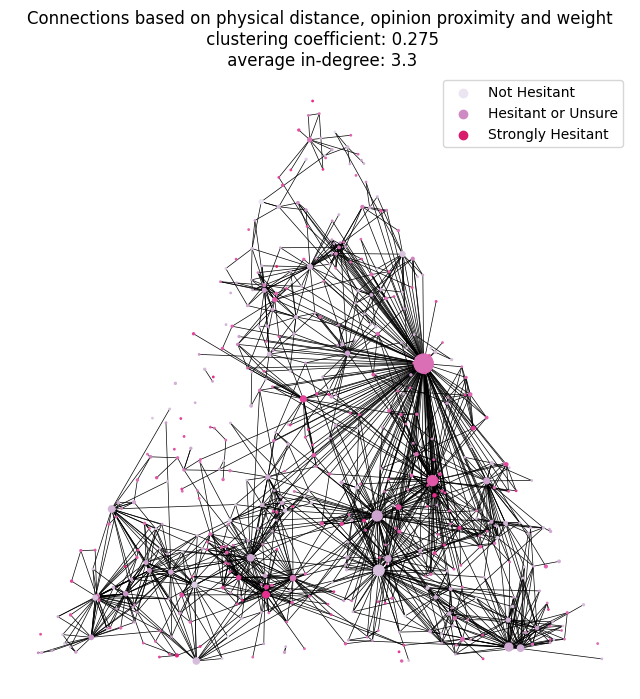

In [11]:
num_agents = 500
model.populate_model(num_agents = num_agents, show_plot = True)

# Run Simulation

Next we will run the model according the speficied parameters.  The simulation will stop when the rolling average net change in agent beliefs crosses below some threshold.

In [ ]:
sim = odyn.NetworkSimulation()
sim.run_simulation(model = model, stopping_thresh = 0.01, show_plot = False, store_results = False)

In [ ]:
fig, ax = plt.subplots()
odyn.get_alluvial_plot_axis(ax = ax,
                            dynamic_belief_df = sim.dynamic_belief_df, 
                            vaccination_threshold = -10, #we ignore this for now
                            hesitant_threshold = 0)
plt.show()

In [ ]:
fig, ax = plt.subplots()
odyn.get_line_plot_axis(ax = ax, dynamic_belief_df = sim.dynamic_belief_df)
plt.show()